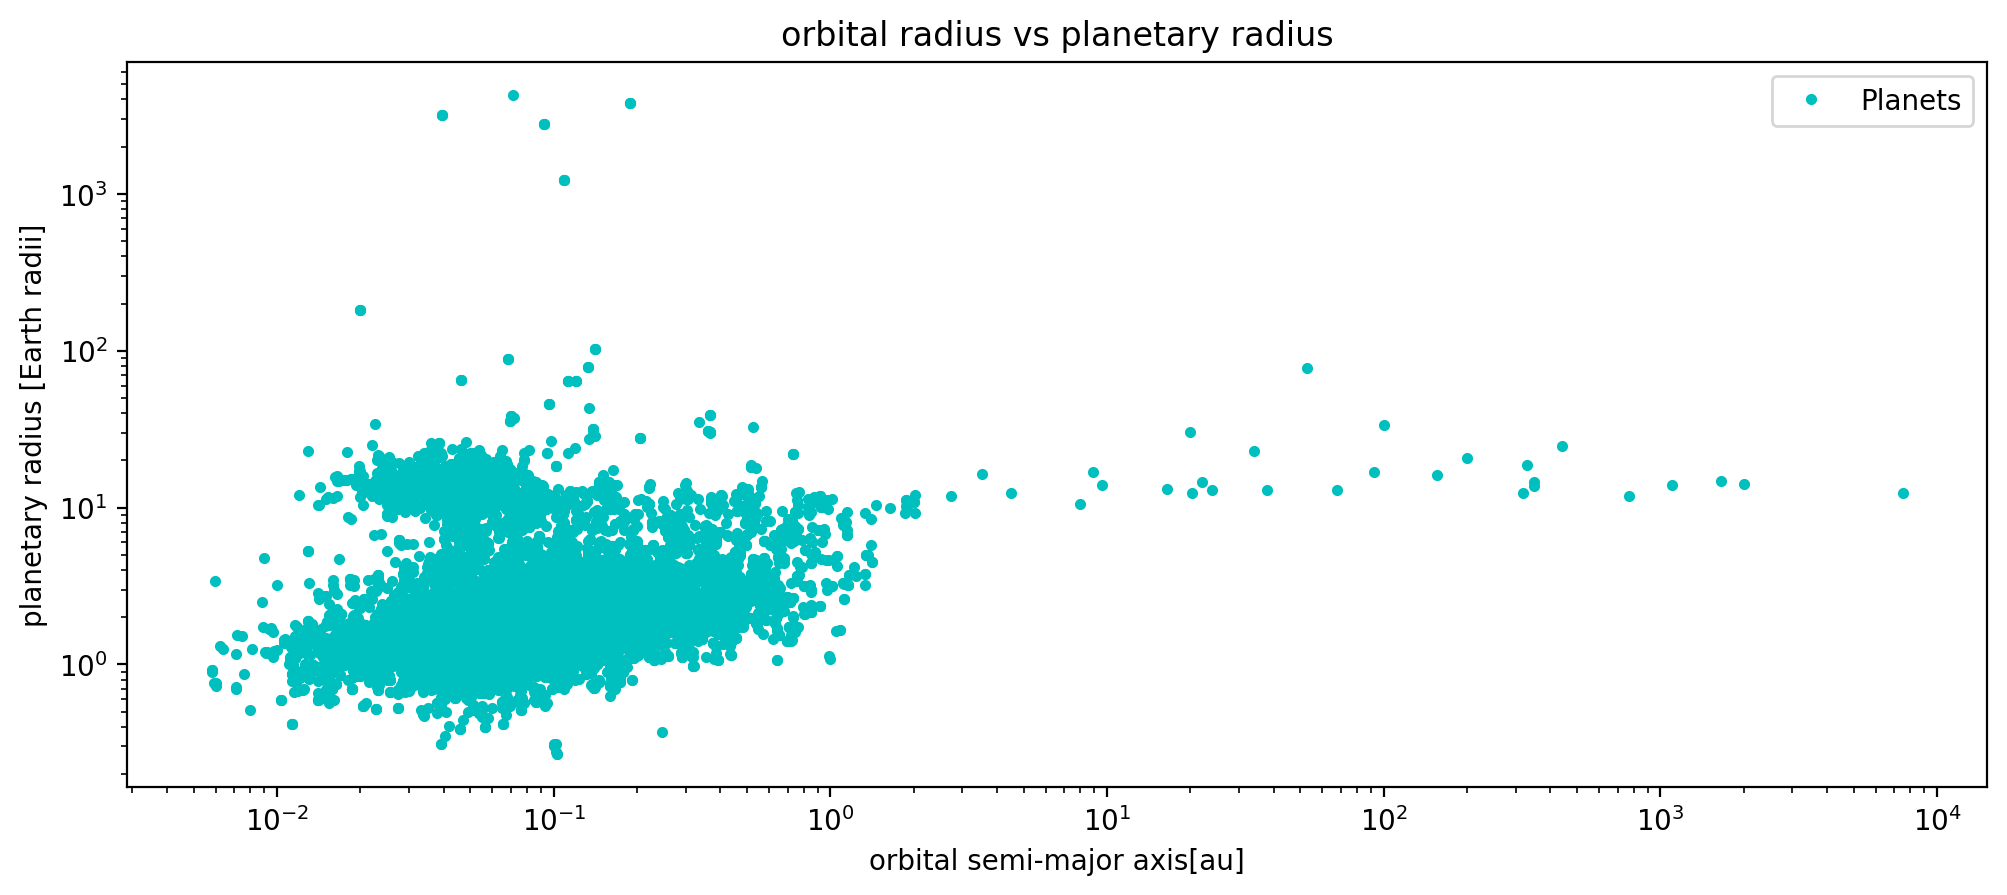

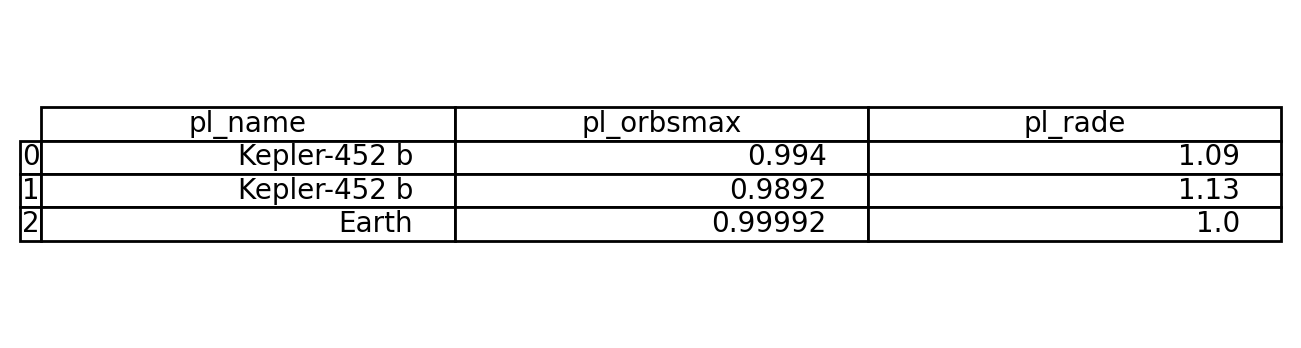

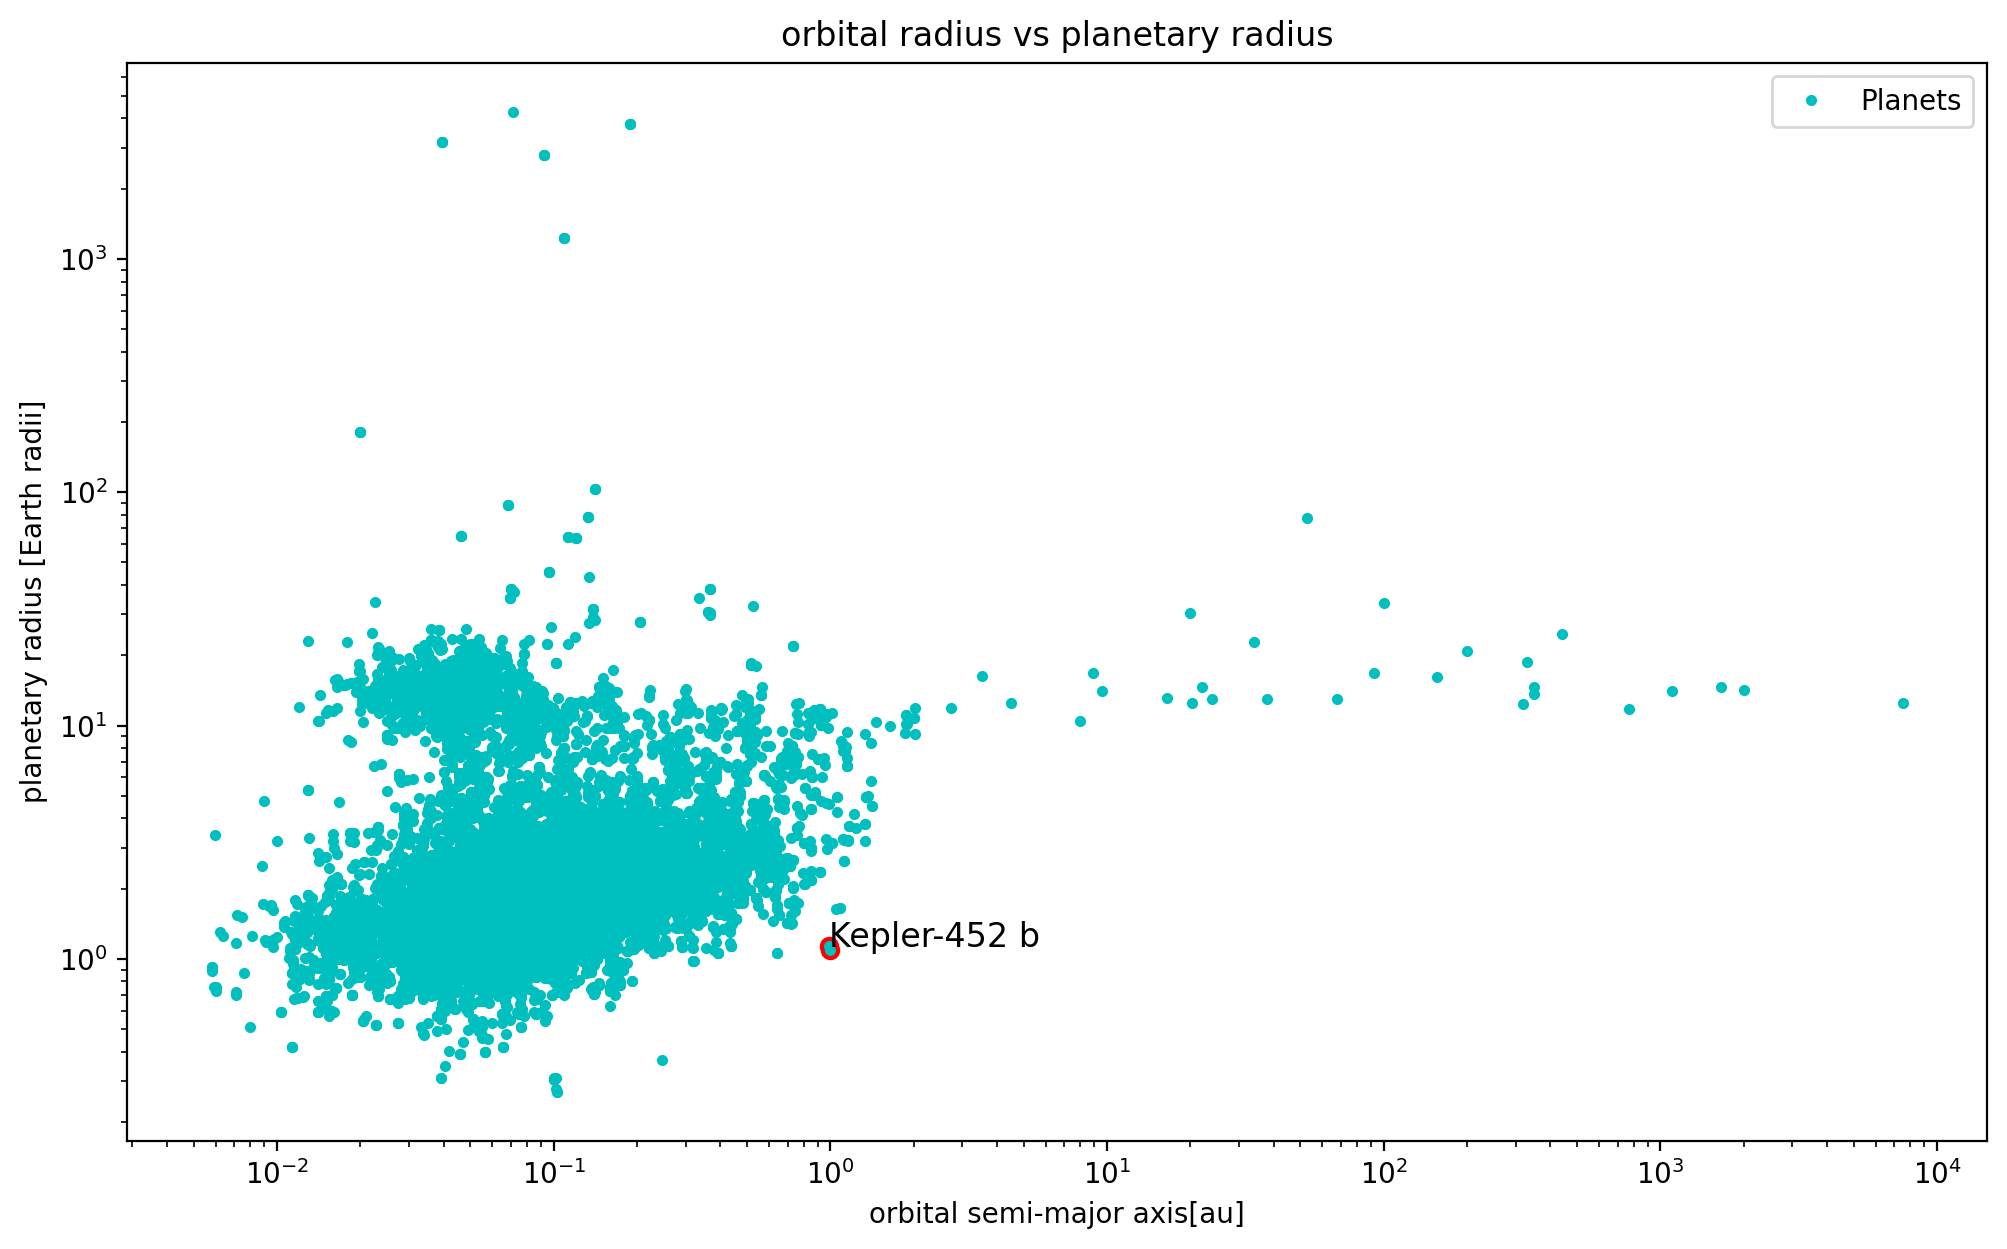

Our assumption is that any habitable planet will have similar properties to Earth. We defined a range for both the orbital semi-major axis and planetary radii that gave acceptably similar values to Earth. From this, we found only one planet in NASA's database that could be a candidate for habitability: ['Kepler-452 b']


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from pandas.plotting import table

#Import Data
Data = pd.read_csv("PS_2024.05.17_06.04.14.csv",skiprows = 36)

#Cut data
orbitalradius = Data["pl_orbsmax"]
planetaryradius = Data["pl_rade"]

fig = plt.figure(figsize=(12,16))
ax1 = fig.add_subplot(311)

#Plot data
ax1.plot(orbitalradius, planetaryradius, marker = '.', linestyle = '', color = 'c', label = 'Planets')
ax1.set_ylabel("planetary radius [Earth radii]")
ax1.set_xlabel("orbital semi-major axis[au]")
ax1.set_title("orbital radius vs planetary radius")
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend()
plt.savefig("Nasa_archive.png")
plt.show()

#Planetary analysis
Planet = Data[(Data["pl_orbsmax"] > 0.7) & (Data["pl_orbsmax"] < 1.3) & (Data["pl_rade"] > 0.7) & (Data["pl_rade"] < 1.3)]
Planet_name = Planet["pl_name"].unique()
Planet_info = Planet[Planet["pl_name"].isin(Planet_name)]

#combined with earth information 
Earth_df = pd.DataFrame({'pl_name': ['Earth'],'pl_orbsmax' : [0.99992], 'pl_rade': [1.0]})
Cut_planet_info = Planet_info[["pl_name","pl_orbsmax","pl_rade"]]
Combined_df = pd.concat([Cut_planet_info, Earth_df], ignore_index = True)

fig2, ax2 = plt.subplots(figsize=(8, 2))
ax2.axis('off')
table(ax2, Combined_df, loc="center")
plt.savefig("table.png")
plt.show()

#identify the planet on the graph 
plt.plot(orbitalradius, planetaryradius, marker = '.', linestyle = '', color = 'c', label = 'Planets')
plt.ylabel("planetary radius [Earth radii]")
plt.xlabel("orbital semi-major axis[au]")
plt.title("orbital radius vs planetary radius")
plt.yscale('log')
plt.xscale('log')
plt.legend()

kepler_orbital = np.array([0.9940, 0.9892])
kepler_planetary = np.array([1.09, 1.13])
plt.scatter(kepler_orbital, kepler_planetary, color = "red")
plt.text(kepler_orbital[1], kepler_planetary[1], "Kepler-452 b", ha = 'left', fontsize = 12)
plt.savefig("kepler.png")
plt.show()

print("Our assumption is that any habitable planet will have similar properties to Earth. We defined a range for both the orbital semi-major axis and planetary radii that gave acceptably similar values to Earth. From this, we found only one planet in NASA's database that could be a candidate for habitability:", Planet_name)
